# Project Title: Stock Reactivity to COVID-19 Trends

# Team Members:
Aryan Ringshia - aryanrr

Neil Mankodi - nmankodi

# Overview

The project aims to investigate how the United States stock market reacted to COVID-19 trends. By analyzing datasets from John Hopkins University capturing COVID-19 cases and Kaggle's US Stock Market Data, we intend to discern patterns between stock market behavior and pandemic dynamics. This exploration sheds light on market reactivity, sector-specific and region-specific responses.

# Motivation

The COVID-19 pandemic profoundly impacted global markets, prompting an urgent need to understand market dynamics during crises. Our motivation stems from the necessity to comprehend how the stock market responds to public health emergencies. By understanding how the stock market reacted during COVID-19, we gain insights into potential future scenarios and how markets might respond to subsequent global pandemics.

The following real-world questions drive our investigation:

1. How did the stock prices of major tech companies (e.g., Apple, Amazon, Microsoft, Netflix, Meta) respond to significant peaks in daily confirmed COVID-19 cases? We aim to identify patterns in market movements during high infection rates and assess sector reactivity.
2. Did fluctuations in economic indicators, such as the S&P 500 index, align with the severity of COVID-19 outbreaks in different states, and were certain industries more resilient during the pandemic? We seek to the identify sectors that we more resilient.
3. How did COVID-19 case counts in specific regions of the USA, for instance in the East and MidWest, affect the stock market the most? This question delves into regional variations in COVID-19 case counts and their corresponding impact. We aim to identify which regions exerted the most significant influence on market reactivity.
4. Is there a correlation between cryptocurrency, gold and silver stock price volatility and daily confirmed COVID-19 cases? 

# Data Sources
Dataset 1:
- Name: COVID-19 data from John Hopkins University
- Link: [John Hopkins University COVID-19 Dataset](https://www.kaggle.com/datasets/antgoldbloom/covid19-data-from-john-hopkins-university)
- Description: This dataset provides county-wise confirmed COVID-19 cases which allows us to track pandemic trends across various regions.

Dataset 2:
- Name: 2019-2024 US Stock Market Data
- Link: [US Stock Market Data](https://www.kaggle.com/datasets/saketk511/2019-2024-us-stock-market-data)
- Description: Kaggle's US Stock Market Data offers comprehensive information on stock prices.

Alone, each dataset offers valuable insights into either pandemic trends or stock market behavior. However, their combination enables correlation analysis between pandemic metrics and stock market behavior, offering insights beyond what either dataset could provide independently.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Data Imports

In [2]:
# Importing the stock market dataset
stock = pd.read_csv("/kaggle/input/2019-2024-us-stock-market-data/Stock Market Dataset.csv", index_col = 0)
# Display the first 5 rows of the dataset
stock.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [3]:
stock.shape

(1243, 38)

In [4]:
# Importing the covid-19 dataset and dropping the first row since it contains county names
covid = pd.read_csv("/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_us_confirmed_cases.csv", low_memory=False).iloc[1:]
# Display the first 5 rows of the dataset
covid.head(5)

,Province_State,Alabama,Alabama.1,Alabama.2,Alabama.3,Alabama.4,Alabama.5,Alabama.6,Alabama.7,Alabama.8,...,Wyoming.15,Wyoming.16,Wyoming.17,Wyoming.18,Wyoming.19,Wyoming.20,Wyoming.21,Wyoming.22,Wyoming.23,Wyoming.24
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
covid.shape

(1142, 3343)

In [6]:
# Importing the covid-19 dataset and dropping the first row since it contains county names
deaths = pd.read_csv("/kaggle/input/covid19-data-from-john-hopkins-university/CONVENIENT_us_deaths.csv", low_memory=False).iloc[1:]
# Display the first 5 rows of the dataset
deaths.head(5)

,Province_State,Alabama,Alabama.1,Alabama.2,Alabama.3,Alabama.4,Alabama.5,Alabama.6,Alabama.7,Alabama.8,...,Wyoming.15,Wyoming.16,Wyoming.17,Wyoming.18,Wyoming.19,Wyoming.20,Wyoming.21,Wyoming.22,Wyoming.23,Wyoming.24
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1/27/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
deaths.shape

(1142, 3343)

# Data Description

List the variables of interest, the size of the data sets, missing values, etc.

Dataset 1: COVID-19 data from John Hopkins University
- Variables of Interest:
    - Date: Date of observation
    - Number of confirmed COVID-19 cases in each state within the United States.
    - Number of confirmed COVID-19 deaths in the United States.
- Size of the Dataset: This dataset contains 1142 rows (entries) and 3343 columns (variables).
- Missing Values: No missing values observed in the COVID dataset.

Dataset 2: 2019-2024 US Stock Market Data
- Variables of Interest:
    - Date: Date of stock market observation
    - Various Stock Features: Including prices and volumes for Natural Gas, Crude Oil, Copper, Bitcoin, Platinum, Ethereum, S&P 500, Nasdaq 100, Apple, Tesla, Microsoft, Silver, Google, Nvidia, Berkshire, Netflix, Amazon, Meta, Gold.
- Size of the Dataset: This dataset contains 1243 rows (entries) and 37 columns (variables).
- Missing Values: Platinum_Vol (607), Silver_Vol (47), Copper_Vol (37), Crude_oil_Vol (23), Natural_Gas_Vol (4), Gold_Vol (2), Nasdaq_100_Vol (1)


There are 772 common dates across both datasets, allowing for the alignment of COVID and stock market data for analysis.

# Data Manipulation

## Covid Cases Data Cleaning

In [8]:
# Renaming the 'Province_State' column to 'Date' and converting the 'Date' column to datetime64
covid.rename(columns={'Province_State': 'Date'}, inplace=True)
covid['Date'] = pd.to_datetime(covid['Date'], format="%m/%d/%y")

In [9]:
# Convert other columns to float
columns_to_convert = covid.columns.difference(['Date'])  
covid[columns_to_convert] = covid[columns_to_convert].astype(float)

In [10]:
# Function to merge and sum columns with the same state names
def merge_and_sum_columns(df):
    # Create a copy of the DataFrame to avoid modifying the original
    merged_df = df.copy()
    
    # Extract state names from columns using regex and merge/sum columns
    for column in df.columns:
        state_name = re.match(r'^([A-Za-z\s]+)', column).group().strip()
        state_name += '_key'
        
        # Check if the state_key column already exists
        if state_name in merged_df.columns:
            merged_df[state_name] += df[column]  # Add the current column to the existing state_key column
        else:
            merged_df[state_name] = df[column]    # Create a new state_key column if it doesn't exist
    
    # Drop the original columns
    merged_df.drop(columns=df.columns, inplace=True)
    
    return merged_df

# Merge and sum columns with the same state names
covid = merge_and_sum_columns(covid)
# Rename the '_key' suffix in the column names
covid.columns = covid.columns.str.replace('_key', '')
covid.sample(5)

,Date,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
464,2021-04-30,409.0,146.0,0.0,844.0,196.0,2270.0,1407.0,786.0,367.0,...,1070.0,3515.0,338.0,128.0,27.0,1249.0,1322.0,395.0,850.0,73.0
100,2020-05-01,253.0,9.0,0.0,314.0,56.0,1834.0,463.0,1064.0,184.0,...,769.0,1308.0,156.0,13.0,0.0,1055.0,310.0,27.0,460.0,7.0
106,2020-05-07,346.0,2.0,0.0,238.0,92.0,1925.0,424.0,789.0,161.0,...,392.0,1445.0,129.0,8.0,0.0,585.0,326.0,45.0,314.0,4.0
251,2020-09-29,1234.0,121.0,0.0,674.0,706.0,3394.0,770.0,182.0,142.0,...,1186.0,4660.0,694.0,4.0,0.0,923.0,532.0,177.0,2367.0,67.0
131,2020-06-01,325.0,8.0,0.0,193.0,190.0,2437.0,213.0,539.0,107.0,...,603.0,1265.0,202.0,2.0,1.0,791.0,537.0,18.0,140.0,7.0


In [11]:
# Fetch the minimum and maximum dates from the datasets
min_date = covid.Date.min()
max_date = stock.Date.min()

In [12]:
# Check for missing values
covid.isna().sum().sort_values(ascending=False)[:5]

Date             0
Pennsylvania     0
Nebraska         0
Nevada           0
New Hampshire    0
dtype: int64

In [13]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 1 to 1142
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1142 non-null   datetime64[ns]
 1   Alabama                   1142 non-null   float64       
 2   Alaska                    1142 non-null   float64       
 3   American Samoa            1142 non-null   float64       
 4   Arizona                   1142 non-null   float64       
 5   Arkansas                  1142 non-null   float64       
 6   California                1142 non-null   float64       
 7   Colorado                  1142 non-null   float64       
 8   Connecticut               1142 non-null   float64       
 9   Delaware                  1142 non-null   float64       
 10  Diamond Princess          1142 non-null   float64       
 11  District of Columbia      1142 non-null   float64       
 12  Florida             

In [14]:
# Check for duplicates
covid[covid.duplicated(subset=['Date'])]

,Date,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming


In [15]:
covid.describe()

,Date,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,1142,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,...,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,2021-08-15 12:00:00,1440.046410,269.400175,7.285464,2139.679510,881.683888,10621.452715,1545.009632,855.216287,289.661121,...,2202.390543,7413.502627,954.768827,133.640981,21.727671,2006.962347,1689.064799,562.837128,1757.077058,162.333625
min,2020-01-23 00:00:00,-8780.000000,-1893.000000,-1.000000,0.000000,-400.000000,-3940.000000,-3133.000000,-15.000000,-1283.000000,...,-5128.000000,-276.000000,0.000000,-1.000000,-26.000000,-232.000000,-2220.000000,-4.000000,0.000000,-601.000000
25%,2020-11-03 06:00:00,0.000000,0.000000,0.000000,0.000000,190.000000,1639.250000,359.250000,20.000000,36.000000,...,545.000000,1010.750000,0.000000,0.000000,0.000000,70.250000,0.000000,23.250000,141.000000,0.000000
50%,2021-08-15 12:00:00,524.000000,5.000000,0.000000,604.000000,483.000000,4653.000000,935.000000,409.000000,157.500000,...,1292.000000,4060.000000,260.500000,10.500000,6.000000,1067.000000,466.000000,277.000000,824.500000,15.000000
75%,2022-05-27 18:00:00,1678.000000,231.750000,0.000000,2776.250000,1011.750000,11113.000000,1786.000000,880.250000,366.500000,...,2426.000000,9686.750000,1148.000000,145.750000,22.000000,2598.750000,1768.500000,820.000000,2121.750000,163.500000
max,2023-03-09 00:00:00,51856.000000,10194.000000,1016.000000,54666.000000,14494.000000,207110.000000,24230.000000,31405.000000,4493.000000,...,22060.000000,76094.000000,39882.000000,5314.000000,673.000000,57703.000000,64166.000000,9164.000000,83187.000000,4085.000000
std,NaN,3021.895687,717.781296,51.984635,3947.508948,1401.700638,19561.781252,2537.857427,1862.809507,460.974654,...,3037.732082,10374.106591,2193.405301,329.861869,54.973711,3690.036899,4471.508498,844.566380,3645.447168,330.192340


In [16]:
# Check for negative values in numerical columns
negative_values = covid.select_dtypes(include='number').lt(0).sum()

print("Columns with negative values:")
print(negative_values[negative_values > 0])

Columns with negative values:
Alabama                      2
Alaska                       1
American Samoa               1
Arkansas                     2
California                   2
Colorado                     1
Connecticut                  2
Delaware                     6
District of Columbia         1
Florida                      5
Georgia                      1
Grand Princess               1
Guam                         1
Hawaii                       9
Idaho                        2
Illinois                     3
Iowa                         2
Kansas                       1
Kentucky                     3
Louisiana                    1
Maine                       10
Maryland                     2
Massachusetts                1
Michigan                     1
Missouri                     4
Montana                      2
Nebraska                    11
Nevada                       5
New Hampshire                1
New Jersey                   4
Northern Mariana Islands     1
Oklahoma 

In [17]:
# Identify negative values to analyze context
negative_cases = covid.loc[:, covid.columns != 'Date'][covid.loc[:, covid.columns != 'Date'] < 0]
anomalous_data = covid[negative_cases.any(axis=1)]
anomalous_data.head()

,Date,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
49,2020-03-11,3.0,0.0,0.0,3.0,0.0,25.0,17.0,2.0,1.0,...,6.0,5.0,1.0,0.0,0.0,1.0,115.0,0.0,1.0,0.0
50,2020-03-12,1.0,0.0,0.0,0.0,0.0,43.0,15.0,2.0,0.0,...,9.0,6.0,0.0,1.0,0.0,3.0,160.0,0.0,4.0,1.0
53,2020-03-15,13.0,0.0,0.0,0.0,-9.0,39.0,33.0,1.0,0.0,...,0.0,4.0,8.0,0.0,0.0,0.0,-39.0,0.0,1.0,0.0
61,2020-03-23,44.0,13.0,0.0,83.0,27.0,376.0,128.0,88.0,12.0,...,221.0,121.0,95.0,23.0,1.0,34.0,224.0,0.0,44.0,0.0
67,2020-03-29,79.0,19.0,0.0,146.0,17.0,-2019.0,247.0,469.0,18.0,...,209.0,337.0,118.0,24.0,1.0,150.0,435.0,17.0,109.0,4.0


In [18]:
# Replace negative values with their absolute values
covid.loc[:, covid.columns != 'Date'] = covid.loc[:, covid.columns != 'Date'].abs()

### COVID Cases Data Cleaning Summary:

1. The original data has the covid cases on a county level but for the purposes of our analyses we need the data to be on a coarser granularity level. In order to make the data more accessible and easier to analyze, we aggregated the county data into state-wise data columns.
2. Renamed the 'Province_State' column to 'Date' and converted the 'Date' column to datetime64 format to ensure consistency.
3. Converted other columns to float datatype to ensure uniformity. 
4. Checked for missing values and confirmed none were present in the dataset.
5. Checked for duplicates in the dataset and found none.
6. Dealt with unrealistic negative values by replacing them with their absolute values, assuming that negative entries were likely due to data recording errors.


## Stock Data Cleaning

In [19]:
# Convert the 'Date' column to datetime64
stock['Date'] = pd.to_datetime(stock['Date'], format='%d-%m-%Y')

In [20]:
stock.columns

Index(['Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price',
       'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
       'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
       'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
       'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
       'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.', 'Gold_Price',
       'Gold_Vol.'],
      dtype='object')

In [21]:
new_column_names = stock.columns.str.replace('.', '') # removing the dot from the column names to avoid any issues
stock.columns = new_column_names # assigning the new column names to the dataframe
stock.columns

Index(['Date', 'Natural_Gas_Price', 'Natural_Gas_Vol', 'Crude_oil_Price',
       'Crude_oil_Vol', 'Copper_Price', 'Copper_Vol', 'Bitcoin_Price',
       'Bitcoin_Vol', 'Platinum_Price', 'Platinum_Vol', 'Ethereum_Price',
       'Ethereum_Vol', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol',
       'Apple_Price', 'Apple_Vol', 'Tesla_Price', 'Tesla_Vol',
       'Microsoft_Price', 'Microsoft_Vol', 'Silver_Price', 'Silver_Vol',
       'Google_Price', 'Google_Vol', 'Nvidia_Price', 'Nvidia_Vol',
       'Berkshire_Price', 'Berkshire_Vol', 'Netflix_Price', 'Netflix_Vol',
       'Amazon_Price', 'Amazon_Vol', 'Meta_Price', 'Meta_Vol', 'Gold_Price',
       'Gold_Vol'],
      dtype='object')

In [22]:
stock.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol,Crude_oil_Price,Crude_oil_Vol,Copper_Price,Copper_Vol,Bitcoin_Price,Bitcoin_Vol,Platinum_Price,...,Berkshire_Price,Berkshire_Vol,Netflix_Price,Netflix_Vol,Amazon_Price,Amazon_Vol,Meta_Price,Meta_Vol,Gold_Price,Gold_Vol
0,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,2024-02-01,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [23]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1242
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1243 non-null   datetime64[ns]
 1   Natural_Gas_Price  1243 non-null   float64       
 2   Natural_Gas_Vol    1239 non-null   float64       
 3   Crude_oil_Price    1243 non-null   float64       
 4   Crude_oil_Vol      1220 non-null   float64       
 5   Copper_Price       1243 non-null   float64       
 6   Copper_Vol         1206 non-null   float64       
 7   Bitcoin_Price      1243 non-null   object        
 8   Bitcoin_Vol        1243 non-null   float64       
 9   Platinum_Price     1243 non-null   object        
 10  Platinum_Vol       636 non-null    float64       
 11  Ethereum_Price     1243 non-null   object        
 12  Ethereum_Vol       1243 non-null   float64       
 13  S&P_500_Price      1243 non-null   object        
 14  Nasdaq_100_Pr

In [24]:
columns_not_numeric_issue = stock.select_dtypes(include='object').columns
columns_not_numeric_issue

Index(['Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price',
       'Nasdaq_100_Price', 'Berkshire_Price', 'Gold_Price'],
      dtype='object')

In [25]:
# Removing the comma and converting the column to float
for column in columns_not_numeric_issue:
    stock[column] = stock[column].str.replace(',', '').astype(float)

In [26]:
stock.select_dtypes(include='object').columns

Index([], dtype='object')

In [27]:
stock.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol,Crude_oil_Price,Crude_oil_Vol,Copper_Price,Copper_Vol,Bitcoin_Price,Bitcoin_Vol,Platinum_Price,...,Berkshire_Price,Berkshire_Vol,Netflix_Price,Netflix_Vol,Amazon_Price,Amazon_Vol,Meta_Price,Meta_Vol,Gold_Price,Gold_Vol
0,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,43194.7,42650.0,901.6,...,589498.0,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,NaN
1,2024-02-01,2.050,161340.0,73.82,577940.0,3.8535,NaN,43081.4,47690.0,922.3,...,581600.0,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.0
2,2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,NaN,42580.5,56480.0,932.6,...,578020.0,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.0
3,2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,NaN,42946.2,55130.0,931.7,...,584680.0,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,2050.9,214590.0
4,2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,NaN,43299.8,45230.0,938.3,...,578800.0,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,2034.9,1780.0


In [28]:
# checking for missing values
print(stock.isna().sum().sort_values(ascending=False)[:8])
columns_with_na = list(stock.isna().sum().sort_values(ascending=False)[:7].index)

Platinum_Vol       607
Silver_Vol          47
Copper_Vol          37
Crude_oil_Vol       23
Natural_Gas_Vol      4
Gold_Vol             2
Nasdaq_100_Vol       1
Meta_Vol             0
dtype: int64


In [29]:
stock.shape

(1243, 38)

In [30]:
# checking if deleting rows with missing values is a viable approach 
columns_for_dropna = ['Silver_Vol', 'Copper_Vol', 'Crude_oil_Vol', 'Natural_Gas_Vol', 'Gold_Vol', 'Nasdaq_100_Vol', 'Meta_Vol']
total_rows_before = len(stock)
stock_no_missing = stock.dropna(subset=columns_for_dropna)
total_rows_after = len(stock_no_missing)
percentage_lost = ((total_rows_before - total_rows_after) / total_rows_before) * 100
print(f"Percentage of data lost: {percentage_lost:.2f}%")

Percentage of data lost: 7.48%


In [31]:
# checking for duplicates
stock[stock.duplicated(subset=['Date'])]

,Date,Natural_Gas_Price,Natural_Gas_Vol,Crude_oil_Price,Crude_oil_Vol,Copper_Price,Copper_Vol,Bitcoin_Price,Bitcoin_Vol,Platinum_Price,...,Berkshire_Price,Berkshire_Vol,Netflix_Price,Netflix_Vol,Amazon_Price,Amazon_Vol,Meta_Price,Meta_Vol,Gold_Price,Gold_Vol


In [32]:
stock.describe()

,Date,Natural_Gas_Price,Natural_Gas_Vol,Crude_oil_Price,Crude_oil_Vol,Copper_Price,Copper_Vol,Bitcoin_Price,Bitcoin_Vol,Platinum_Price,...,Berkshire_Price,Berkshire_Vol,Netflix_Price,Netflix_Vol,Amazon_Price,Amazon_Vol,Meta_Price,Meta_Vol,Gold_Price,Gold_Vol
count,1243,1243.000000,1239.000000,1243.000000,1.220000e+03,1243.000000,1206.000000,1243.000000,1.243000e+03,1243.000000,...,1243.000000,1243.000000,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,1.243000e+03,1243.000000,1241.000000
mean,2021-08-02 10:03:34.320193024,3.494714,131624.116223,67.577064,3.989038e+05,3.541957,35406.616915,25241.903057,4.033918e+07,959.003620,...,404273.051488,2426.524537,404.839541,7.057401e+06,128.683234,7.413005e+07,239.728134,2.325851e+07,1759.246742,211127.671233
min,2019-02-04 00:00:00,1.482000,1200.000000,-37.630000,1.702000e+04,2.100500,10.000000,3397.700000,2.600000e+02,595.200000,...,240000.000000,80.000000,166.370000,1.140000e+06,79.410000,1.763000e+07,88.910000,5.470000e+06,1272.000000,0.000000
25%,2020-04-28 12:00:00,2.347500,91900.000000,55.095000,2.835975e+05,2.858750,370.000000,10014.600000,7.907500e+04,889.775000,...,318984.500000,345.000000,323.010000,3.990000e+06,96.260000,5.264500e+07,183.355000,1.478500e+07,1669.600000,152200.000000
50%,2021-08-03 00:00:00,2.702000,127370.000000,69.230000,3.668850e+05,3.666000,10180.000000,23055.100000,2.153100e+05,944.700000,...,418349.000000,1510.000000,384.150000,5.610000e+06,128.730000,6.520000e+07,224.430000,1.934000e+07,1804.200000,197970.000000
75%,2022-11-05 12:00:00,4.055500,169460.000000,80.455000,5.072425e+05,4.137250,68340.000000,37784.200000,6.151050e+05,1020.400000,...,471500.000000,3225.000000,495.365000,7.910000e+06,158.110000,8.674500e+07,301.650000,2.711500e+07,1912.800000,257920.000000
max,2024-02-02 00:00:00,9.647000,381970.000000,123.700000,1.770000e+06,4.937500,176040.000000,67527.900000,4.470000e+09,1297.100000,...,589498.000000,13850.000000,691.690000,1.333900e+08,186.570000,3.113500e+08,474.990000,2.304100e+08,2089.700000,813410.000000
std,NaN,1.822540,64385.141749,20.465500,2.161619e+05,0.702819,38415.448731,16029.009055,2.940889e+08,108.012849,...,86369.903899,2660.497572,114.989473,6.384187e+06,30.808631,3.245753e+07,71.015427,1.555486e+07,203.258901,115006.351292


In [33]:
# Checking for unrealistic values
columns_with_negative_min = [col for col in stock.columns[1:] if stock[col].min() < 0]
columns_with_negative_min

['Crude_oil_Price']

In [34]:
stock[stock['Crude_oil_Price'] < 0]

,Date,Natural_Gas_Price,Natural_Gas_Vol,Crude_oil_Price,Crude_oil_Vol,Copper_Price,Copper_Vol,Bitcoin_Price,Bitcoin_Vol,Platinum_Price,...,Berkshire_Price,Berkshire_Vol,Netflix_Price,Netflix_Vol,Amazon_Price,Amazon_Vol,Meta_Price,Meta_Vol,Gold_Price,Gold_Vol
938,2020-04-20,1.924,229820.0,-37.63,247950.0,2.328,1260.0,6833.5,1260000.0,788.6,...,282800.0,720.0,437.49,12660000.0,119.68,115410000.0,178.24,16110000.0,1711.2,186910.0


In [35]:
def neighborhood_imputation_negative(df, column_to_replace, surrounding_rows=5) -> pd.DataFrame:
    """This function performs neighborhood mean imputation on a dataframe."""
    for index, value in df[df[column_to_replace] < 0].iterrows(): # iterating through the rows with negative values
        start_index = max(0, index - surrounding_rows) # getting the start index for the surrounding rows
        end_index = min(df.index.max(), index + surrounding_rows) # getting the end index for the surrounding rows
        surrounding_rows_data = df.loc[start_index:end_index, column_to_replace].drop(index) # getting the surrounding rows
        mean_of_surrounding_rows = surrounding_rows_data.mean() # calculating the mean of the surrounding rows
        df.at[index, column_to_replace] = mean_of_surrounding_rows # imputing the mean value
    return df

In [36]:
stock.loc[938-5:938+5, 'Crude_oil_Price'].drop(938).mean()

17.054

In [37]:
# imputing the negative value in the stock dataset
stock = neighborhood_imputation_negative(stock, 'Crude_oil_Price')

In [38]:
# rechecking for unrealistic values
columns_with_negative_min = [col for col in stock.columns[1:] if stock[col].min() < 0]
columns_with_negative_min

[]

In [39]:
columns_with_na

['Platinum_Vol',
 'Silver_Vol',
 'Copper_Vol',
 'Crude_oil_Vol',
 'Natural_Gas_Vol',
 'Gold_Vol',
 'Nasdaq_100_Vol']

In [40]:
# understanding how and where missing values are present
stock[stock['Copper_Vol'].isna()]

,Date,Natural_Gas_Price,Natural_Gas_Vol,Crude_oil_Price,Crude_oil_Vol,Copper_Price,Copper_Vol,Bitcoin_Price,Bitcoin_Vol,Platinum_Price,...,Berkshire_Price,Berkshire_Vol,Netflix_Price,Netflix_Vol,Amazon_Price,Amazon_Vol,Meta_Price,Meta_Vol,Gold_Price,Gold_Vol
0,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,43194.7,42650.0,901.6,...,589498.0,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,NaN
1,2024-02-01,2.050,161340.0,73.82,577940.0,3.8535,NaN,43081.4,47690.0,922.3,...,581600.0,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.0
2,2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,NaN,42580.5,56480.0,932.6,...,578020.0,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.0
3,2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,NaN,42946.2,55130.0,931.7,...,584680.0,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,2050.9,214590.0
4,2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,NaN,43299.8,45230.0,938.3,...,578800.0,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,2034.9,1780.0
5,2024-01-26,2.712,73020.0,78.01,365460.0,3.8520,NaN,41811.3,69470.0,921.3,...,582300.0,10040.0,570.42,12770000.0,159.12,51050000.0,394.14,13160000.0,2026.6,410.0
6,2024-01-25,2.571,44980.0,77.36,320180.0,3.8690,NaN,39935.7,46300.0,894.5,...,576211.0,9350.0,562.00,9450000.0,157.75,43310000.0,393.18,15090000.0,2027.1,460.0
7,2024-01-24,2.641,65500.0,75.09,323730.0,3.8860,NaN,40086.0,58640.0,914.9,...,570977.0,9560.0,544.87,26350000.0,156.87,47640000.0,390.70,15700000.0,2025.4,800.0
8,2024-01-23,2.450,69160.0,74.37,306060.0,3.7935,NaN,39888.8,82670.0,905.5,...,564133.0,8640.0,492.19,14190000.0,156.02,34930000.0,385.20,15450000.0,2035.2,370.0
9,2024-01-22,2.419,121580.0,75.19,28910.0,3.7635,NaN,39556.4,85100.0,903.0,...,558316.0,11600.0,485.71,5210000.0,154.78,43690000.0,381.78,17490000.0,2031.5,330.0


In [41]:
columns_with_na.remove('Platinum_Vol')

In [42]:
columns_with_na

['Silver_Vol',
 'Copper_Vol',
 'Crude_oil_Vol',
 'Natural_Gas_Vol',
 'Gold_Vol',
 'Nasdaq_100_Vol']

In [43]:
def missing_imputation(df, column_name, nearest_count=5) -> pd.DataFrame:
    """This function performs neighborhood mean imputation on a DataFrame's missing values."""
    for i in range(len(df)): # iterating through the rows
        if pd.isnull(df.at[i, column_name]): # checking if the value is missing
            # getting the nearest values before the missing value that are not missing
            front_values = df[column_name].iloc[i-1::-1].dropna().head(nearest_count)

            # getting the nearest values after the missing value that are not missing
            back_values = df[column_name].iloc[i+1:].dropna().head(nearest_count)
            valid_values = pd.concat([front_values, back_values]) # combining the valid values
            if not valid_values.empty: # checking if there are valid values
                mean_value = valid_values.mean() # calculating the mean of the valid values
            else:
                mean_value = df[column_name].mean() # if there are no valid values, use the mean of the column
            df.at[i, column_name] = mean_value # imputing the mean value
    return df

In [44]:
# performing imputation on all columns with missing values
for column in columns_with_na:
    stock = missing_imputation(stock, column)

In [45]:
stock.drop(columns=['Platinum_Vol'], axis=1, inplace=True)

In [46]:
stock.isna().sum().sort_values(ascending=False)[:5]

Date               0
Microsoft_Price    0
Silver_Price       0
Silver_Vol         0
Google_Price       0
dtype: int64

In [47]:
stock.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol,Crude_oil_Price,Crude_oil_Vol,Copper_Price,Copper_Vol,Bitcoin_Price,Bitcoin_Vol,Platinum_Price,...,Berkshire_Price,Berkshire_Vol,Netflix_Price,Netflix_Vol,Amazon_Price,Amazon_Vol,Meta_Price,Meta_Vol,Gold_Price,Gold_Vol
0,2024-02-02,2.079,117730.0,72.28,517602.0,3.8215,31476.000000,43194.7,42650.0,901.6,...,589498.0,10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,2053.7,145926.0
1,2024-02-01,2.050,161340.0,73.82,577940.0,3.8535,57494.333333,43081.4,47690.0,922.3,...,581600.0,9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,2071.1,260920.0
2,2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,57494.333333,42580.5,56480.0,932.6,...,578020.0,9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,2067.4,238370.0
3,2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,57494.333333,42946.2,55130.0,931.7,...,584680.0,9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,2050.9,214590.0
4,2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,57494.333333,43299.8,45230.0,938.3,...,578800.0,13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,2034.9,1780.0


In [48]:
stock.shape

(1243, 37)

### Summary of Stock Data Cleaning Process:
1. We dropped unnecessary columns like the "Unnamed: 0" from the DataFrame.
2. We converted the Date column (originally storing dates as a string) into the pandas DateTime format.
3. We cleaned the column names to make them easy to use via dot notation if needed downstream. This was done by removing the trailing period that occurs with trading volume columns.
4. We observed the current overview of the data with the help of the info functionality. This informed us that there are columns currently of the dtype object when they should actually be stored as a float. We reformatted these columns by replacing the comma with empty strings and then converting the dtype to float. Some of the columns that went through this process of reformatting were Bitcoin_Price, Platinum_Price, S&P_500_Price etc. 
5. We then explore missing values and perform a check to determine if directly dropping rows with NaN values is a suitable approach. It is not due to the significant data loss.
6. We check for duplicates to ensure that there are no such issues that can cause merging errors downstream.
7. We then deal with unrealistic values present in the DataFrame. In our case, the Crude_oil_Price has a negative value which is not possible. This issue is dealt with by perfoming a neighborhood mean imputation of the entries with such unrealistic values.
8. We then impute the missing values by using a slightly modified neighborhood mean imputation procedure. We observed that the missing values tend to bunch together making it difficult to directly pick up x entries on either side of the missing value to perform the imputation. We use a modified approach where the function will search for the nearest x non missing entries on either side of the current missing value and then use these to perform the imputation. This often will require the function to go beyond the nearest x values to actually find x non missing entries.
9. We then drop the column Platinum_Vol due to it having nearly 50% missing entries. The logic behind dropping it and not doing the above imputation was that imputing so many values would greatly bias any analysis we perform using the column. In pursuit of better quality analysis we made the decision to simply drop this column. The large number of columns and diverse features makes up for the loss of this one column.
10. We then create a new column that tracks the direction of movement of the S&P stock price. This categorical data will prove useful for indepth visualization and analysis in later sections.

## Covid Deaths Data Cleaning

In [49]:
# Renaming the 'Province_State' column to 'Date' and converting the 'Date' column to datetime64
deaths.rename(columns={'Province_State': 'Date'}, inplace=True)
deaths['Date'] = pd.to_datetime(deaths['Date'], format="%m/%d/%y")

# Convert other columns to float
columns_to_convert = deaths.columns.difference(['Date'])  
deaths[columns_to_convert] = deaths[columns_to_convert].astype(float)

# Summing up all rows except for the 'Date' column
total_deaths = deaths.drop(columns=['Date']).sum(axis=1)

# Concatenate the 'Date' column and the calculated 'Total Deaths' column
deaths = pd.concat([deaths['Date'], total_deaths], axis=1)

# Rename the new column
deaths.columns = ['Date', 'Total Deaths']

# Display the first 5 rows of the updated DataFrame
deaths.head(5)

,Date,Total Deaths
1,2020-01-23,0.0
2,2020-01-24,0.0
3,2020-01-25,0.0
4,2020-01-26,0.0
5,2020-01-27,0.0


In [50]:
deaths.describe()

,Date,Total Deaths
count,1142,1142.000000
mean,2021-08-15 12:00:00,984.093695
min,2020-01-23 00:00:00,-253.000000
25%,2020-11-03 06:00:00,324.000000
50%,2021-08-15 12:00:00,706.500000
75%,2022-05-27 18:00:00,1415.000000
max,2023-03-09 00:00:00,4375.000000
std,NaN,927.404683


In [51]:
# Check for duplicates
deaths[deaths.duplicated(subset=['Date'])]

,Date,Total Deaths


In [52]:
# Replace negative values with their absolute values
deaths.loc[:, deaths.columns != 'Date'] = deaths.loc[:, deaths.columns != 'Date'].abs()

### Deaths Dataset Data Cleaning Summary:

- Dropped the first row since it contained county names.
- Renamed the 'Province_State' column to 'Date' and converted the 'Date' column to datetime64 format to ensure consistency.
- Converted other columns to float datatype to enable numerical computations and maintain consistency in data types.
- Calculated the total number of deaths by summing up all rows except for the 'Date' column, providing aggregated information.
- Checked for duplicates in the dataset and found none.
- Dealt with unrealistic negative values by replacing them with their absolute values, assuming that negative entries were likely due to data recording errors.

## Merging

In [53]:
# Merge the datasets using inner join
merged_df = pd.merge(stock, covid, on='Date', how='inner')

merged_df = pd.merge(merged_df, deaths, on='Date', how='inner')

merged_df.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol,Crude_oil_Price,Crude_oil_Vol,Copper_Price,Copper_Vol,Bitcoin_Price,Bitcoin_Vol,Platinum_Price,...,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Total Deaths
0,2023-03-09,2.543,138150.0,75.72,349960.0,4.0390,54530.0,20361.8,468760.0,949.3,...,295.0,1493.0,0.0,15.0,0.0,0.0,0.0,708.0,0.0,590.0
1,2023-03-08,2.551,132610.0,76.66,335930.0,4.0270,79040.0,21710.8,316510.0,940.6,...,10634.0,0.0,1141.0,3.0,1.0,0.0,0.0,674.0,0.0,730.0
2,2023-03-07,2.687,149480.0,77.58,398240.0,3.9750,77400.0,22197.8,304750.0,936.3,...,567.0,0.0,0.0,3.0,4510.0,0.0,0.0,782.0,226.0,335.0
3,2023-03-06,2.572,246370.0,80.46,292350.0,4.0885,63750.0,22410.0,215310.0,978.6,...,359.0,0.0,0.0,12.0,0.0,0.0,0.0,1260.0,0.0,47.0
4,2023-03-03,3.009,185070.0,79.68,374200.0,4.0670,74569.0,22354.4,344630.0,979.4,...,552.0,0.0,0.0,1.0,0.0,0.0,1706.0,710.0,0.0,507.0


## Create new columns for US Regional Zones 

In [54]:
# Define the mapping of states to regions (zones)
state_to_zone = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

# Create new columns for each zone and sum up values for states in that zone
for zone, states in state_to_zone.items():
    merged_df[zone] = merged_df[states].sum(axis=1)

## Creating direction column for S&P 500 stock price

In [55]:
# creating a new column for the price direction of the S&P 500
merged_df['S&P_500_Price_Direction'] = \
    merged_df['S&P_500_Price'].diff().fillna(0).apply(lambda x: 'up' if x > 0 else ('down' if x < 0 else 'equal'))

In [56]:
merged_df[['S&P_500_Price', 'S&P_500_Price_Direction']].head(5)

,S&P_500_Price,S&P_500_Price_Direction
0,3918.32,equal
1,3992.01,up
2,3986.37,down
3,4048.42,up
4,4045.64,down


## Merged DataFrame - Data Description

In [57]:
# Display the shape of the merged DataFrame
merged_df.shape

(772, 101)

The merged DataFrame has 772 rows and 101 columns.

In [58]:
# Check for missing values
missing_values = merged_df.isna().sum()

# Print missing values
print("Missing Values:")
if missing_values.sum() == 0:
    print("No missing values found.")
else:
    print(missing_values)

Missing Values:
No missing values found.


In [59]:
# Display summary statistics of the merged DataFrame Zones
merged_df[['Northeast', 'Midwest', 'South', 'West']].describe()

,Northeast,Midwest,South,West
count,772.000000,772.000000,772.000000,772.000000
mean,17469.826425,22883.792746,41523.404145,23742.663212
std,24780.270312,30048.495765,54983.660822,33694.422093
min,0.000000,0.000000,0.000000,0.000000
25%,5022.500000,6590.000000,12568.500000,7329.250000
50%,12892.500000,15110.500000,24408.500000,14542.000000
75%,20809.500000,28401.000000,49665.250000,27245.750000
max,242260.000000,298485.000000,561451.000000,295855.000000


In [60]:
# Select financial columns
financial_columns = [col for col in merged_df.columns if 'Price' in col or 'Vol' in col]

# Display summary statistics for financial indicators
print("Summary Statistics for Financial Indicators:")
merged_df[financial_columns].describe()


Summary Statistics for Financial Indicators:


,Natural_Gas_Price,Natural_Gas_Vol,Crude_oil_Price,Crude_oil_Vol,Copper_Price,Copper_Vol,Bitcoin_Price,Bitcoin_Vol,Platinum_Price,Ethereum_Price,...,Berkshire_Price,Berkshire_Vol,Netflix_Price,Netflix_Vol,Amazon_Price,Amazon_Vol,Meta_Price,Meta_Vol,Gold_Price,Gold_Vol
count,772.000000,772.000000,772.000000,7.720000e+02,772.000000,772.000000,772.000000,7.720000e+02,772.000000,772.000000,...,772.000000,772.000000,772.000000,7.720000e+02,772.000000,7.720000e+02,772.000000,7.720000e+02,772.000000,772.000000
mean,4.081337,127509.290155,67.946508,3.681154e+05,3.719170,29736.144547,28859.483161,6.457255e+07,983.261723,1710.741360,...,397529.151554,1677.940415,426.212474,7.291425e+06,140.433394,8.048307e+07,240.510194,2.626001e+07,1803.241321,206133.108808
std,2.094586,63892.049213,24.284361,1.936620e+05,0.725702,38200.531267,16688.889051,3.711747e+08,119.128413,1231.803409,...,70684.219138,1221.193748,132.485034,7.436693e+06,28.840758,3.518293e+07,74.445235,1.767941e+07,96.814425,92944.354709
min,1.482000,1200.000000,10.010000,1.702000e+04,2.100500,10.000000,4826.000000,2.600000e+02,595.200000,107.900000,...,240000.000000,120.000000,166.370000,1.140000e+06,81.820000,2.904000e+07,88.910000,6.700000e+06,1477.900000,30.000000
25%,2.520000,86470.000000,46.705000,2.803100e+05,3.113875,307.500000,13561.025000,9.186500e+04,904.462500,428.997500,...,338500.000000,550.000000,323.495000,3.740000e+06,114.792500,5.669250e+07,177.812500,1.655750e+07,1741.675000,153927.500000
50%,3.353000,123595.000000,70.875000,3.499900e+05,3.822250,2455.000000,23233.450000,1.981100e+05,974.550000,1570.540000,...,418697.500000,1565.000000,461.880000,5.490000e+06,152.820000,7.029500e+07,238.895000,2.228500e+07,1806.100000,186920.000000
75%,5.502000,163445.000000,84.225000,4.402700e+05,4.323000,60387.500000,42748.750000,4.652925e+05,1049.550000,2686.580000,...,452697.750000,2452.500000,523.147500,8.300000e+06,164.322500,9.396250e+07,304.247500,3.038250e+07,1867.700000,239715.000000
max,9.647000,381970.000000,123.700000,1.770000e+06,4.937500,176040.000000,67527.900000,4.470000e+09,1297.100000,4808.380000,...,539180.000000,6500.000000,691.690000,1.333900e+08,186.570000,3.113500e+08,382.050000,2.304100e+08,2069.400000,745840.000000


# Data Visualization

## Boxplot Comparison of Number of Cases against Zone

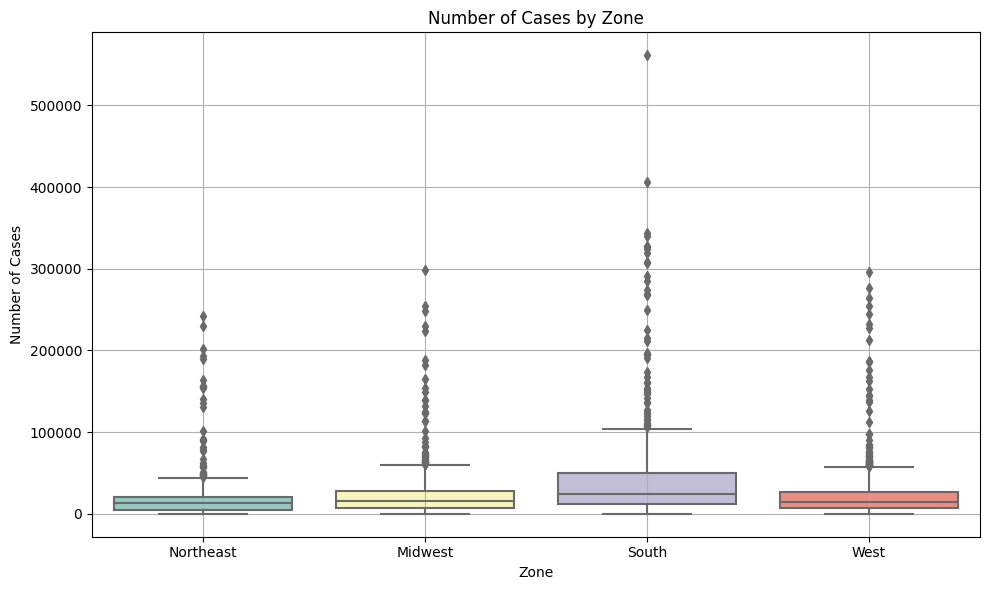

In [61]:
# Define the columns representing zones
zones = ['Northeast', 'Midwest', 'South', 'West']

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[zones], palette="Set3")
plt.title('Number of Cases by Zone')
plt.xlabel('Zone')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.tight_layout()
plt.show()


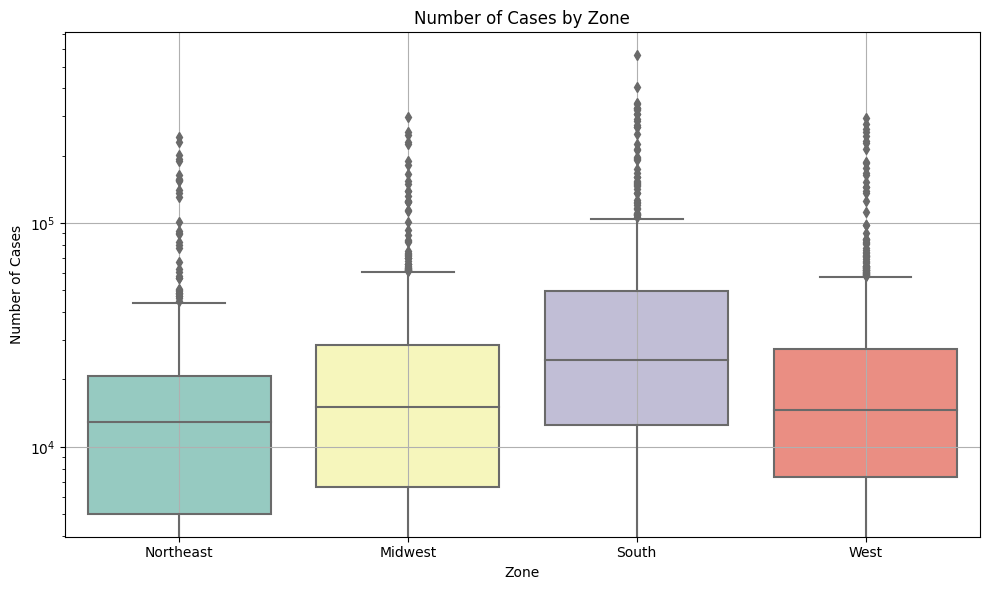

In [62]:
# Create a boxplot with log scale
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[zones], palette="Set3")
plt.title('Number of Cases by Zone')
plt.xlabel('Zone')
plt.ylabel('Number of Cases')

# Change y axis to log scale
plt.yscale('log')

plt.grid(True)
plt.tight_layout()
plt.show()

#### Interpretation:

- The box plots illustrate the distribution of the number of cases across different zones in the dataset.
- The South zone exhibits the highest median number of cases among all zones while the Northeast zone shows the lowest median number of cases.
- Outliers are observed in all zones, but they appear to be more prominent in the South and West zones, indicating significant variations or extreme values in certain areas.
- Changing the y-axis to a logarithmic scale enhances the visibility of variations in case counts across zones.
- Despite the transformation, the South zone still exhibits the highest median number of cases, and the Northeast zone maintains the lowest median.


## Histogram of Total Cases & Deaths Per Day

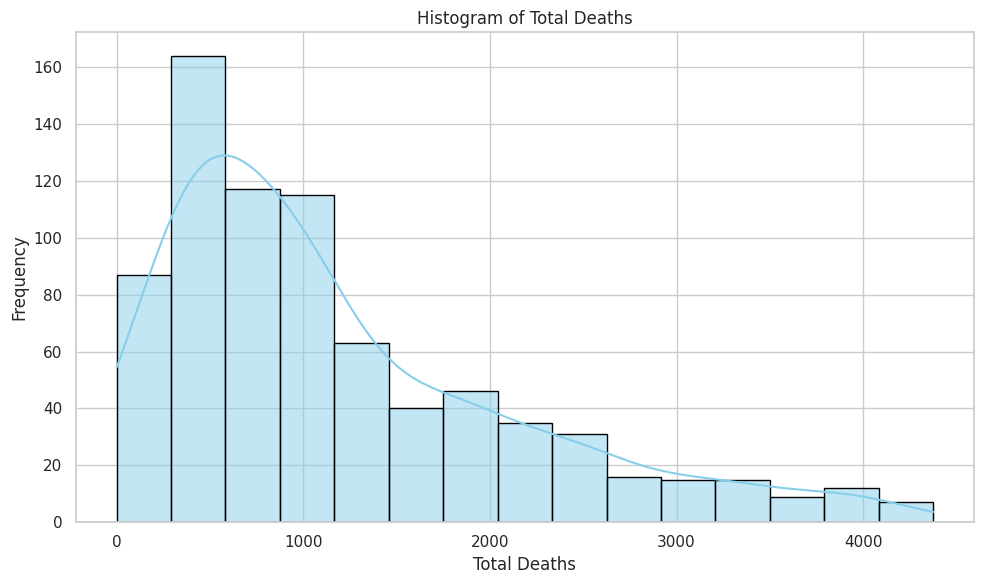

In [63]:
sns.set(style="whitegrid")

# Create histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Total Deaths'], bins=15, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Interpretation:

The histogram of total deaths per day depicts a right-skewed distribution. The majority of days observed relatively low death counts, with the highest frequency occurring around the 500 mark. 

In [64]:
# Create temporary new column for total cases by summing cases for each zone
merged_df['Total Cases'] = merged_df[['Northeast', 'Midwest', 'South', 'West']].sum(axis=1)

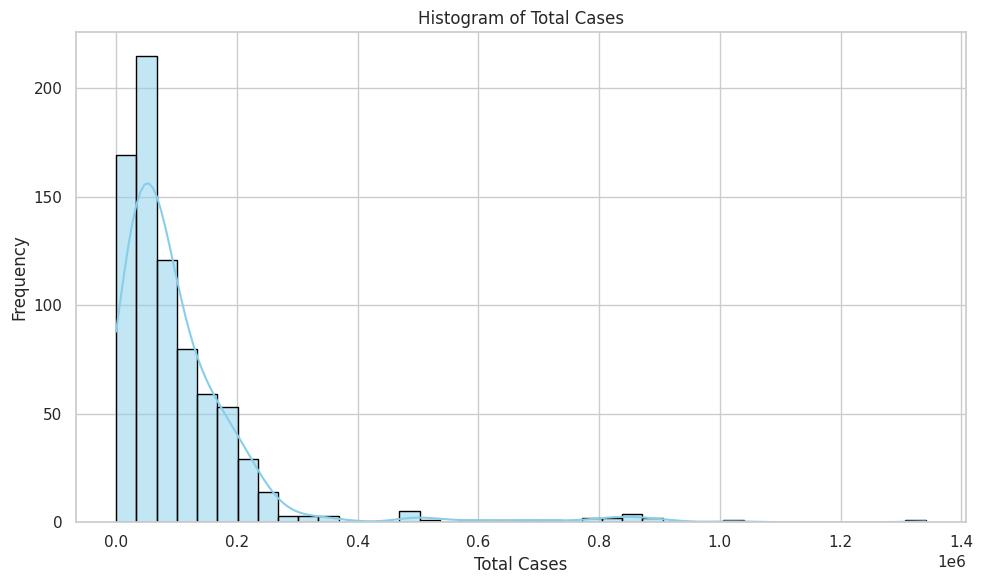

In [65]:
sns.set(style="whitegrid")

# Create histogram plot for total cases
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Total Cases'], bins=40, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

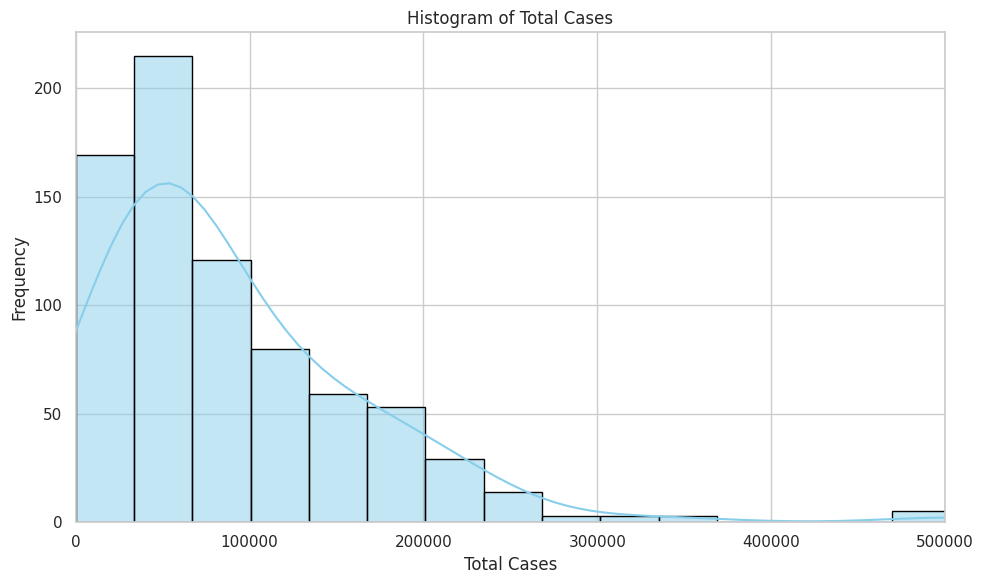

In [66]:
sns.set(style="whitegrid")

# Create histogram plot for total cases after setting x-axis limit
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Total Cases'], bins=40, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.xlim(0, 0.5e6)
plt.tight_layout()
plt.show()

#### Interpretation:

The histogram of total cases reveals a right-skewed distribution towards the lower end of the case count spectrum. The majority of days exhibit a relatively low number of cases. We infer that most days recorded total cases below 200,000, with only a few instances of higher case counts. From the point of view of hospitals and pharmacies this information can be useful for resource planning and logistics. By setting the x-axis limit to a maximum of 500,000 cases, the histogram provides a clearer view of the distribution within this range.

## Trading Lag Plot

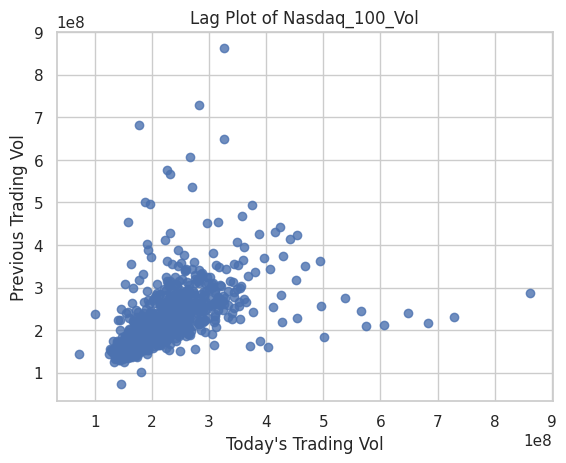

In [67]:
lag = merged_df['Nasdaq_100_Vol'].copy() # creating a copy of the S&P 500 price column
lag = np.array(lag[:-1]) # getting the previous day's trading volume
current = merged_df['Nasdaq_100_Vol'][1:] # getting the current day's trading volume by shifting by 1
ax = sns.regplot(x=current, y=lag, fit_reg=False) # creating the lag plot
ax.set_ylabel("Previous Trading Vol") # setting the y-axis label
ax.set_xlabel("Today's Trading Vol") # setting the x-axis label
ax.set_title("Lag Plot of Nasdaq_100_Vol") # setting the title
plt.show()

#### Interpretation: <br>
The lag plot is a useful tool for when we want to check for temporal dependencies. In this case we are trying to observe if the previous Nasdaq 100 trading volume is in any way related to the current day's trading volumne. We see that there is a definitive pattern visible in the lag plot that can be utilized for all sorts of analyses and machine learning algorithms. 

## Pair Plot

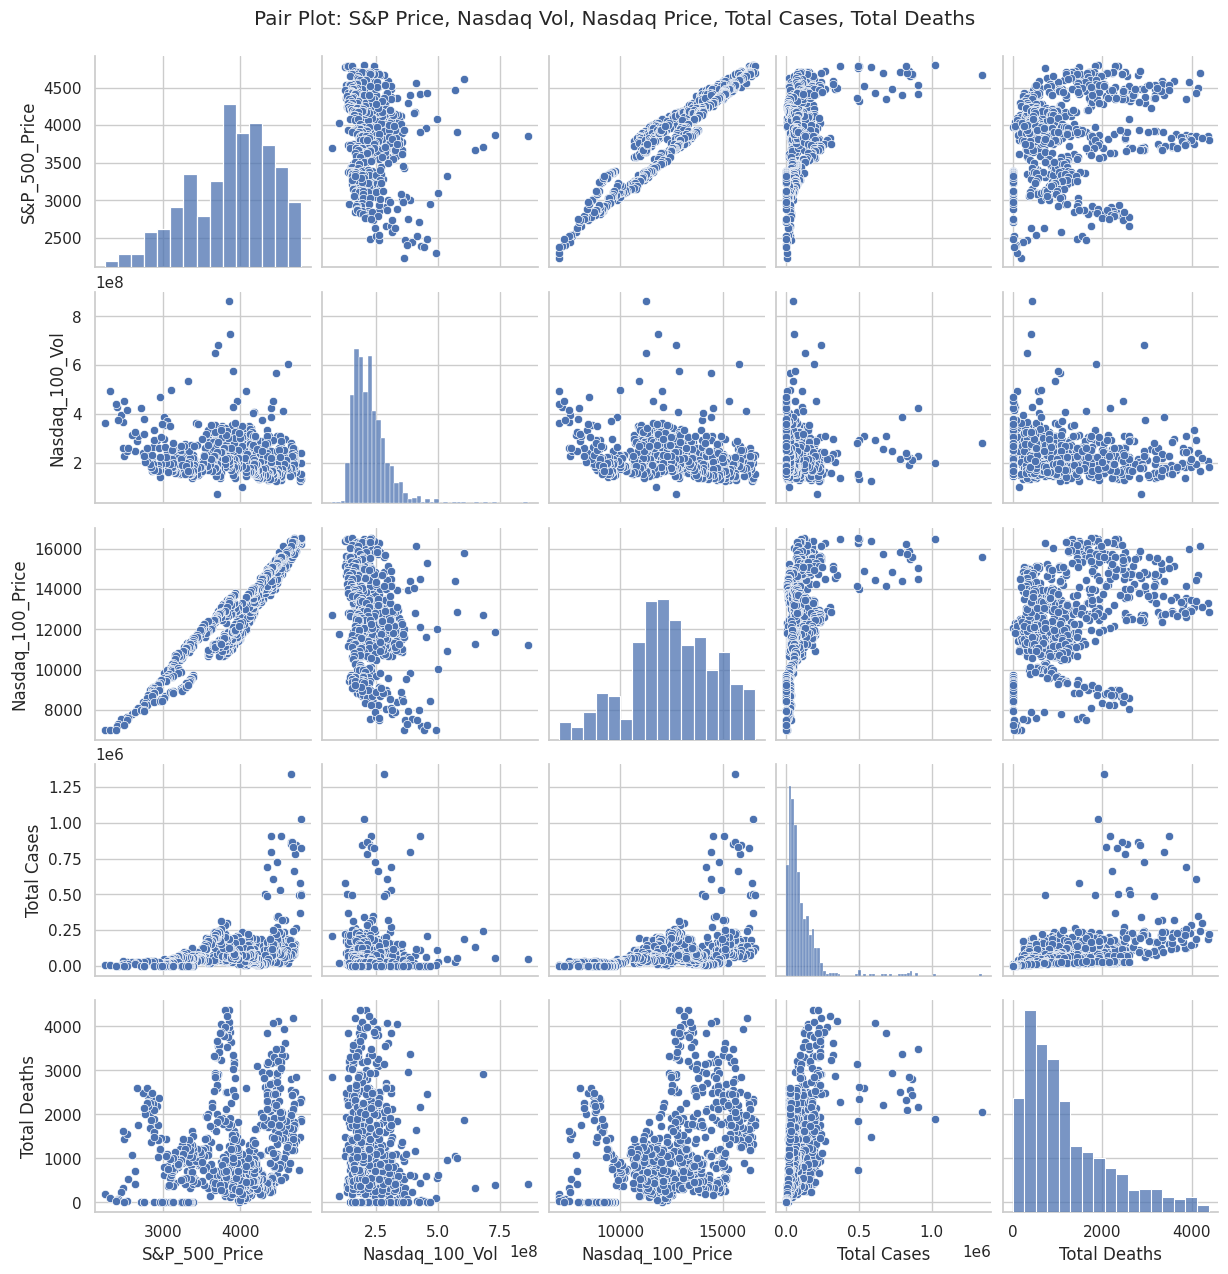

In [68]:
#deciding which features to include in the pair plot
columns_to_plot = ['S&P_500_Price', 'Nasdaq_100_Vol', 'Nasdaq_100_Price', 'Total Cases', 'Total Deaths']
pair_plot = sns.pairplot(merged_df[columns_to_plot]) #creating the pair plot
pair_plot.fig.suptitle('Pair Plot: S&P Price, Nasdaq Vol, Nasdaq Price, Total Cases, Total Deaths', y=1.02) #setting a title
plt.show()

#### Interpretation: <br>
Pair plots are excellent visualizations for getting a sense of the kind of data we are working with. We use it in our case to observe the distributions and inter-relations between the features - S&P_500_Price, Nasdaq_100_Vol, Nasdaq_100_Price, Total Cases, and Total Deaths. The histograms are useful in observing skewness and general trend in the distribution, and the scatter plots give us an idea of correlations between features like the S&P_500_Price and Total Cases for example. 

## Correlation Heatmap

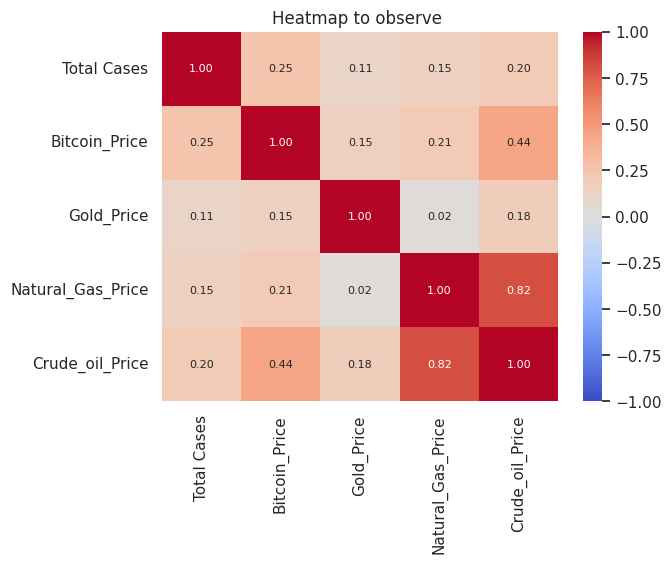

In [69]:
#deciding which features to include in the heatmap
columns_to_plot = ["Total Cases", "Bitcoin_Price", "Gold_Price", "Natural_Gas_Price", "Crude_oil_Price"]

#creating the heatmap and reformatting it to make it more usable and accessible
sns.heatmap(merged_df[columns_to_plot].corr(), cmap="coolwarm",vmax=1,vmin=-1,annot=True, fmt=".2f", annot_kws={"size": 8})
plt.title("Heatmap to observe ") #setting a title for the heatmap
plt.show()

#### Interpretation: <br>
This heatmap allows us to observe similarities and differences in the way in which different sectors like Cryptocurrency, Gold, Natural Gas, and Crude Oil react to changes in total covid cases for that day. We can observe that while Natural Gas and Crude Oil are reacting similarly, Bitcoin and Gold seem to be displaying a very weak correlation. This implies that there some differing characteristics in these sectors which may be worth exploring in detail. 

# END OF NOTEBOOK